<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/0314_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 

- 한글 폰트 참고) https://teddylee777.github.io/colab/colab-korean/

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (28.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and dir

In [3]:
plt.rc('font', family = 'NamuBarunGothic')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#경고창 무시
warnings.filterwarnings('ignore')

- 스케일 조정

In [9]:
sns.set_context('paper', #notebook, talk, poster
                rc = {'font size':15,
                      'xtick.labelsize':15,
                      'ytick.labelsize':15,
                      'axes.labelsize':15}
                )

 - 다변량 데이터: 변량이 2개인 이변량 데이터와 변량이 3개 이상인 데이터를 포함함. 

 - 다변량 데이터를 그래프로 표현할 떄는 색상으로 구분하는 hue, 캔버스로 구분하는 col, 점 크기로 구분하는 size등의 파라미터를 이용해 시각화 차원을 넓혀나갈 수 있음

## 1) 병렬 막대 그래프.
 - 두 변량에 대한 빈도 막대그래프 2개를 각가 캔버스(Canvas)에 병렬로 나열한 그래프
  - sns.catplot함수에 kind = 'count'와 col에 옵션을 주면됨
  

In [11]:
df_titanic = sns.load_dataset('titanic')  

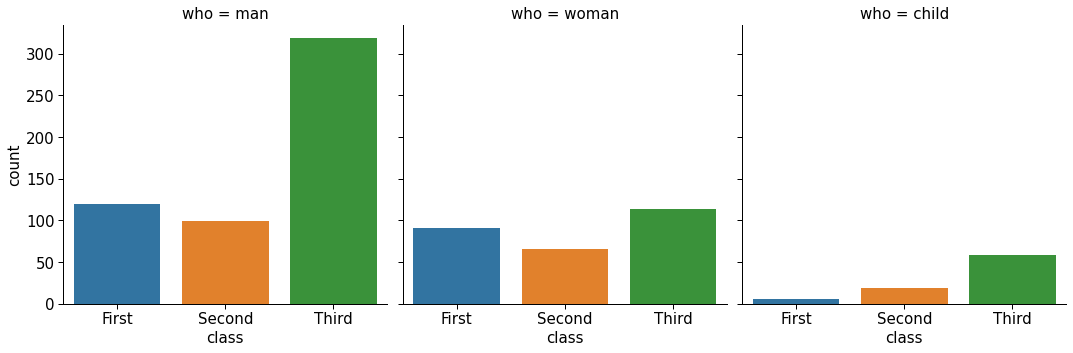

In [12]:
sns.catplot(x='class',
            col = 'who', #캔버스 분리하기
            kind = 'count', #빈도 막대그래프 그리기 
            data = df_titanic)

<AxesSubplot:xlabel='class', ylabel='count'>

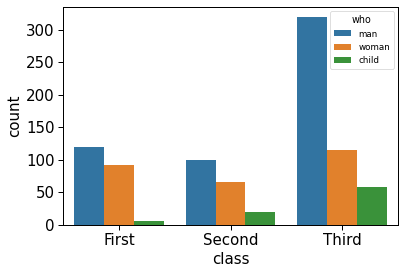

In [16]:
#코드 1)
sns.countplot(x='class', hue='who', data = df_titanic)

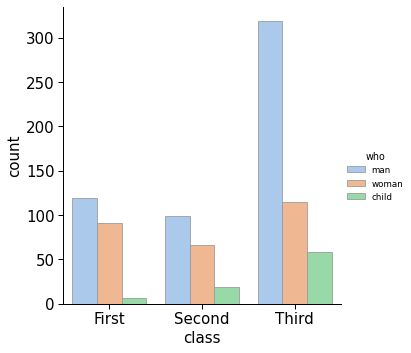

In [14]:
# 코드2) 
sns.catplot(x = 'class', hue ='who', kind = 'count',
            palette = 'pastel', #색상 팔레트 지정 : {'man': 'b', 'women': 'g', 'child': 'r'}
            edgecolor ='.6',
            data= df_titanic)

- sns.histplot 함수에 multiple='dodge' 옵션을 주어도 다중 막대그래프를 그릴 수 있습니다. sns.histplot 함수는 수치형 자료를 히스토그램으로 만들 때 사용하는 함수이지만, 히스토그램의 막대 사이에 간격을 주고 x축 눈금을 없애면 히스토그램을 일반 막대그래프처럼 만들 수 있습니다.

"\nax = sns.histplot(x='sex', hue='survived', \n                  multiple='dodge', # 다중 막대그래프 그리기\n                  shrink=.8, # 막대 사이 간격 조정\n                  data=df_titanic) \nax.tick_params(bottom=False) # x축 눈금 숨기기"

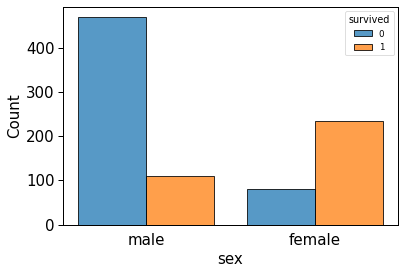

In [23]:
ax = sns.histplot(x='sex', hue='survived',
                  multiple='dodge', #다중막대그래프 그리기
                  shrink=.8, #막대 사이 간격 조정
                  data = df_titanic)
ax.tick_params(bottom=False) #x축 눈금 숨기기

"""
ax = sns.histplot(x='sex', hue='survived', 
                  multiple='dodge', # 다중 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df_titanic) 
ax.tick_params(bottom=False) # x축 눈금 숨기기"""

### 3) 누적 막대그래프

- Seaborn으로 누적 막대그래프를 만들려면 sns.histplot 함수에 multiple='stack' 옵션을 주면 됩니다.

In [ ]:
ax = sns.histplot(x='sex', hue='survived',
                  multiple='dodge', #다중막대그래프 그리기
                  shrink=.8, #막대 사이 간격 조정
                  data = df_titanic)
ax.tick_params(bottom=False) #x축 눈금 숨기기

- 단순 수평 누적 막대그래프
     - 수평 누적 막대그래프를 그리려면 x 파라미터 대신 y 파라미터를 사용하면 됩니다.

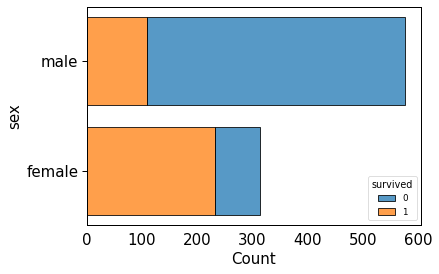

In [24]:
ax = sns.histplot(y='sex', hue='survived', 
                  multiple='stack', # 누적 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df_titanic) 
ax.tick_params(bottom=False) # x축 눈금 숨기기

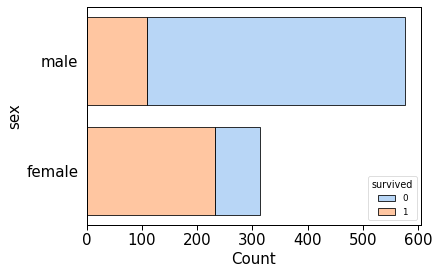

In [25]:
ax = sns.histplot(y='sex', hue='survived',  
                  multiple='stack', # 누적 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  palette='pastel', # 색상 팔레트 지정
                  data=df_titanic);
ax.tick_params(left=False) # y축 눈금 안 보이게 하기

지금까지 다중 막대그래프와 누적 막대그래프로 이변량 범주형 데이터를 시각화하는 법을 알아보았습니다. 막대그래프 외에도 변량이 모두 범주형인 다차원 데이터를 시각화할 때는 모자이크 그래프(mosaic plot)를 사용하기도 합니다. 모자이크 그래프는 그룹 내의 데이터 백분율을 보여주는 누적 막대그래프입니다. 모자이크 그래프는 변수가 3개 이상일 때도 사용할 수 있습니다.

모자이크 그래프는 statmodels.graphics.mosaic 패키지의 mosaic 함수를 이용해서 그립니다. 코드는 다음과 같습니다.

Text(0.5, 1.0, '타이타닉호 성별 생존자')

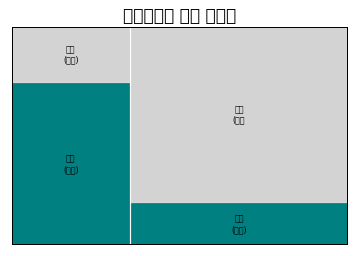

In [30]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

props = lambda key:{'color':'teal' if '1' in key else 'lightgray'}
labelizer = lambda k: {('female', '1'): '여성\n(생존)', ('female', '0'): '여성\n(사망)',
                       ('male', '1'): '남성\n(생존)', ('male', '0'): '남성\n(사망'}[k]

mosaic(df_titanic.sort_values('sex'),
       ['sex','survived'],
       properties = props, #색상변경
       labelizer = labelizer, #라벨변경
       axes_label = False) #측 라벨 숨기기

plt.title('타이타닉호 성별 생존자', fontsize=17)      #제목 내용 및 글자 크기 설정               


#matplot쓸 때는 한글을 안 쓰는게 좋기는 함

 - stripplot

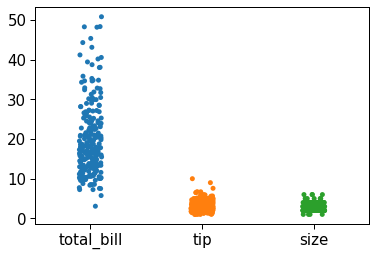

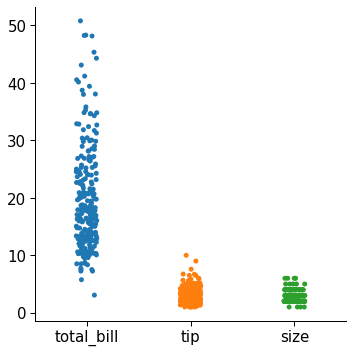

In [32]:
 df_tips = sns.load_dataset('tips') #팁 데이터

 sns.stripplot(data = df_tips)

 # or

 sns.catplot(kind = 'strip', data = df_tips)

# 다차원 데이터 시각화 : 수치형

### 1) 점그래프

- 점그래프는 데이터포인트를 점으로 나타낸 도표입니다. 점그래프를 이용하면 데이터의 실제 위치와 분포를 한눈에 파악할 수 있습니다. Seaborn에서 점그래프를 그리는 기본 함수는 sns.stripplot입니다.

#### stripplot


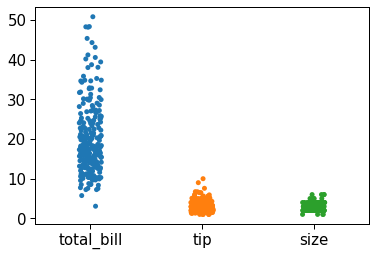

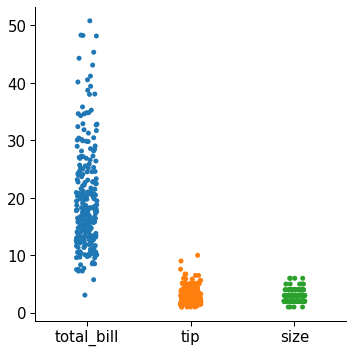

In [34]:
df_tips = sns.load_dataset('tips')# 팁 데이터

sns.stripplot(data = df_tips)

#or

sns.catplot(kind='strip', data = df_tips)

- sns.stripplot 함수에 jitter 옵션을 추가하면 데이터포인트를 일렬로 그릴 수 있습니다.

    - jitter: 지터(jitter)는 데이터 값에 약간의 노이즈를 추가하는 것, 노이즈를 추가하면 데이터 값이 조금씩 움직여서 같은 값을 가지는 데이터가 그래프에 여러 번 겹쳐서 표시되는 현상을 막아줌

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

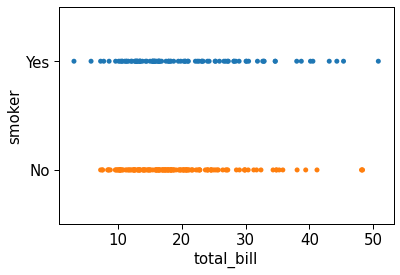

In [35]:
sns.stripplot(x = 'total_bill',y='smoker',
              jitter=False,
              data = df_tips)

<AxesSubplot:xlabel='tip', ylabel='day'>

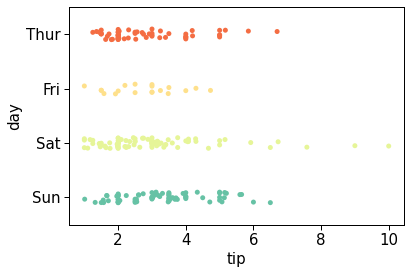

In [36]:
sns.stripplot(x = 'tip', y = 'day',
              palette = 'Spectral', #색상 팔레트 지정
              dodge = True,
              data = df_tips)

- dodge=True 옵션처럼 점그래프에서 데이터 포인트들이 서로 겹치지 않고 새의 무리처럼 보이게 그래프를 만드는 방법도 있습니다. 이때 사용하는 함수가 sns.swarmplot입니다.

#### swarmplot

- swarmplot 함수를 이용하면 점도표의 데이터포인트를 떼(swarm)처럼 무리를 만들어 데이터포인트가 중첩되는 문제를 해결할 수 있습니다. 떼 플롯을 그리는 기본 코드는 다음과 같습니다.

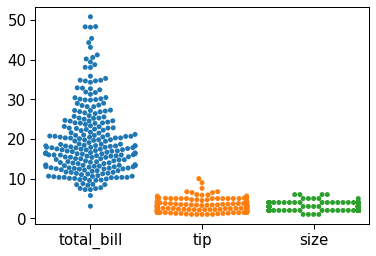

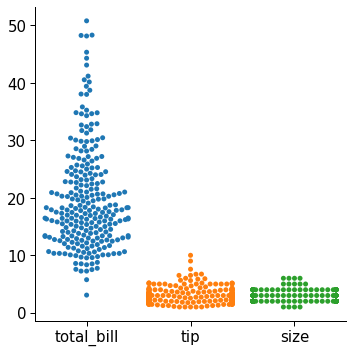

In [37]:
sns.swarmplot(data=df_tips)

# 또는 

sns.catplot(kind='swarm', data=df_tips)

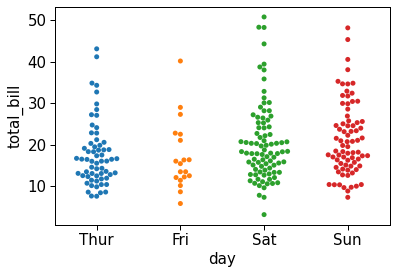

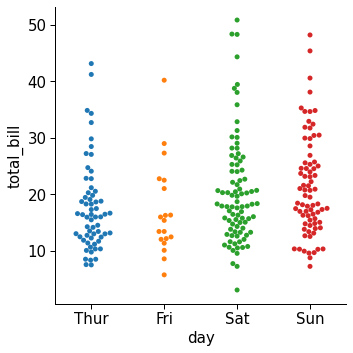

In [38]:
sns.swarmplot(x='day', y='total_bill', data=df_tips)

# 또는 

sns.catplot(x='day', y='total_bill', kind='swarm', data=df_tips)

### 2) 선분 그래프

- 실수 데이터의 분포를 선분으로 표현하고 싶다면 sns.rugplot 함수를 이용하면 됩니다. sns.rugplot은 데이터포인트를 각 축 위에 보여줍니다.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

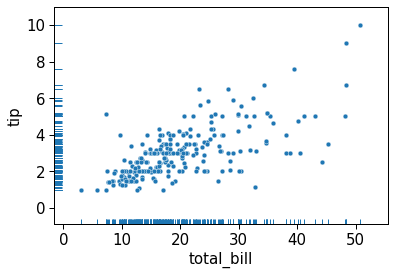

In [39]:
# rugplot은 겹치는 지점을 x,y축에 표시 
sns.scatterplot(data=df_tips, x="total_bill", y="tip")
sns.rugplot(data=df_tips, x="total_bill", y="tip") #잘 쓰진 않음

### 3) 요약 통계값 막대그래프

요약 통계값 막대그래프는 범주로 구분되는 수치형 자료의 평균과 그 평균의 95% 신뢰구간(confidence intervals)을 나타낸 막대그래프입니다. 신뢰구간은 막대 위 검정색 수직 선으로 표현됩니다. 요약 통계값 막대그래프를 그리려면 sns.barplot 함수를 사용하면 됩니다. sns.catplot 함수에 kind='bar' 옵션을 주어도 됩니다. 먼저 수직 요약 막대그래프를 그리는 법부터 알아보겠습니다.

**기본**


수직 요약 막대그래프

- 수직 평균 막대그래프를 그리는 코드는 다음과 같습니다.

  -왜 95프로 신뢰구간을 쓰는지?
    95프로가 된다면 99프로는 자동으로 들어감 
    95프로가 더 안정적이라서 
    p-value 5프로 보다 작으면 유의함(1프로 이미 포함됨)

    *그럼 5프로는 다 틀린것인가? 아님 
    *95개가 맞다는 걸 가르킴킴



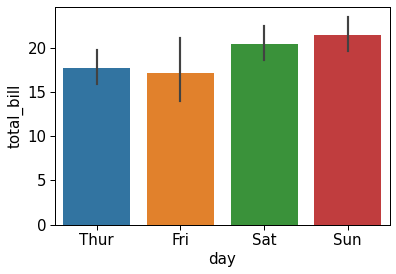

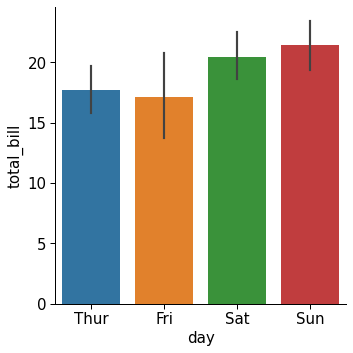

In [42]:
#띠가 달라지는 이유? -> 편차가 심하다는 걸 알려줌(95신뢰도는 같지만, 편차가 큼)
### 3) 요약 통계값 막대그래프
sns.barplot(x='day', y='total_bill', data=df_tips)

# 또는 

sns.catplot(x='day', y='total_bill', kind='bar', data=df_tips)

- 여기에 ci='sd' 옵션을 주면 신뢰구간이 아니라 표준편차(standard deviation)를 표현할 수 있습니다.

수평 요약 막대그래프

- 만일 요약 막대그래프를 수평으로 그리고 싶다면 sns.barplot 함수에 orient='h' 옵션을 추가하면 됩니다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

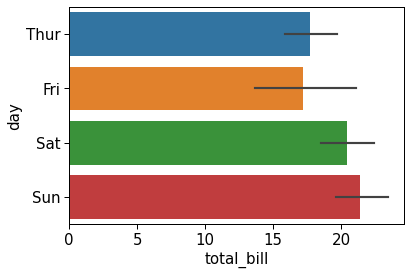

In [43]:
sns.barplot(x='total_bill', y='day', orient='h', data=df_tips)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

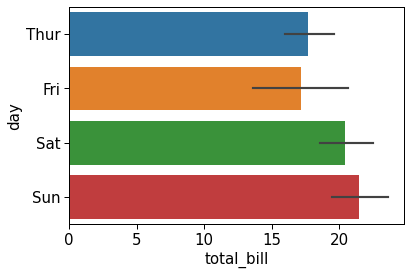

In [44]:
sns.barplot(x='total_bill', y='day', orient='h', data=df_tips)

다중 요약 막대그래프

sns.barplot 함수에 hue 파라미터를 추가하면 평균을 나타내는 다중 막대그래프를 그릴 수 있습니다.

수직 다중 요약 막대그래프

다음은 변량이 3개인 데이터를 수직 다중 요약 막대그래프로 표현하는 예시 코드입니다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

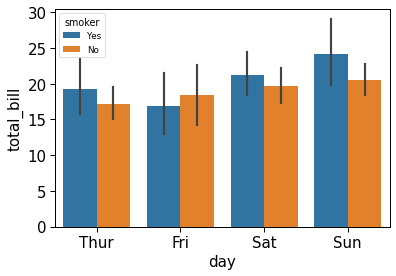

In [46]:
sns.barplot(x='day', y='total_bill',hue='smoker', data=df_tips)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

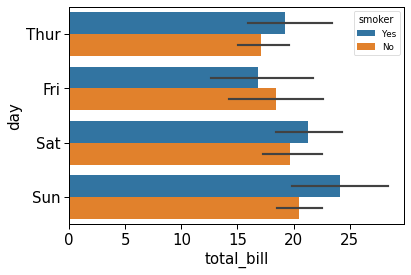

In [47]:
sns.barplot(x='total_bill', y='day', hue='smoker', orient='h', data=df_tips)

누적 요약 막대그래프


누적 요약 막대그래프를 그리고 싶다면 sns.barplot 함수에 dodge=False을 추가하면 됩니다. Seaborn에서 누적 막대그래프는 평균값을 나타내는 막대의 최댓값 위에 다른 평균값을 나타내는 막대를 쌓아서 만드는 것이 아니라 그래프 자체를 서로 겹쳐서 그린 것입니다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

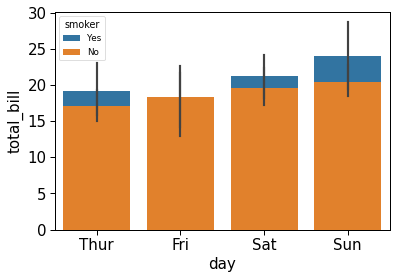

In [48]:
sns.barplot(x='day', y='total_bill', hue='smoker', dodge=False,data=df_tips)

In [ ]:
sns.pointplot(x='day', y = 'total_bill', data = df_titanic)

#또는 

sns.catplot(x='day', y ='total_bill', kind='point', data = df_titanic)

In [49]:
titanic = sns.load_datasets('titanic')
sns.pointplot(x ='class', y ='survived', hue='sex',
              palette = {'male':'g'. 'female':'m'}, #g: green / m: agenta
              markers = ['^', 'o']. #마커 지정
              linestyles = ['-', '--'] #선 스타일 지정
              data = titanic)

SyntaxError: ignored

### 5)히스토그램.

Seaborn에서 히스토그램을 만드는 함수는 sns.histplot입니다. sns.displot 함수를 이용해도 됩니다. Seaborn에서 sns.histplot 함수로 이변량 히스토그램(bivariate histogram)을 그릴 때는 변량을 색상으로 구분합니다. 여기서는 sns.histplot 대신 sns.displot을 이용해 히스토그램을 만들어 보겠습니다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

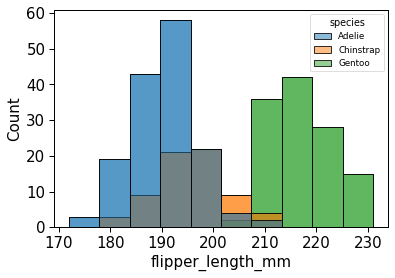

In [50]:
df_penguins = sns.load_dataset('penguins')

sns.histplot(x='flipper_length_mm',hue='species',data=df_penguins)

#또는

sns.histplot(x='flipper_length_mm',hue='species',data=df_penguins)

옵션을 이용하면 다양한 종류의 히스토그램을 그릴 수 있습니다.

hue: 그룹별 히스토그램

multiple='stack': 누적 히스토그램

multiple='dodge': 다중 히스토그램

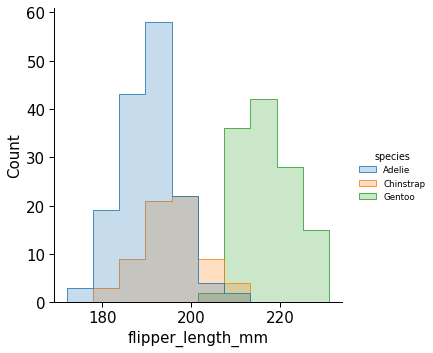

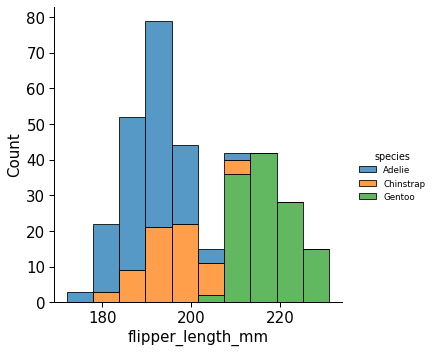

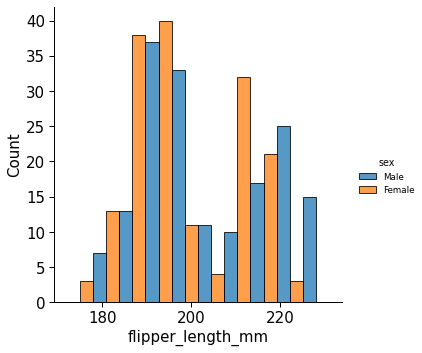

In [51]:
sns.displot(x='flipper_length_mm', hue='species', 
             element='step', data=df_penguins) # 코드2
sns.displot(x='flipper_length_mm', hue='species', 
             multiple='stack', data=df_penguins) # 코드3
sns.displot(x='flipper_length_mm', hue='sex', 
             multiple='dodge', data=df_penguins) # 코드4

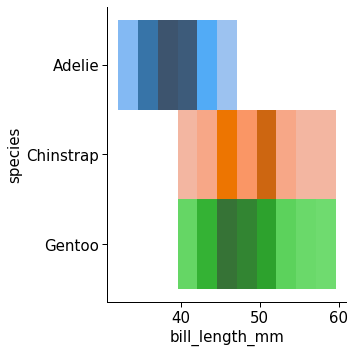

In [52]:
# legend를 끄면 블러가 생김 왜?

sns.displot(x='bill_length_mm', y ='species', hue ='species', legend = False, data = df_penguins)

log_scale=True: x축 값 로그 스케일로 변환

element='poly': 그래프를 분포다각형(distribution polygon)으로 지정

fill=False: 그래프 선 아래 색깔 채우지 않기

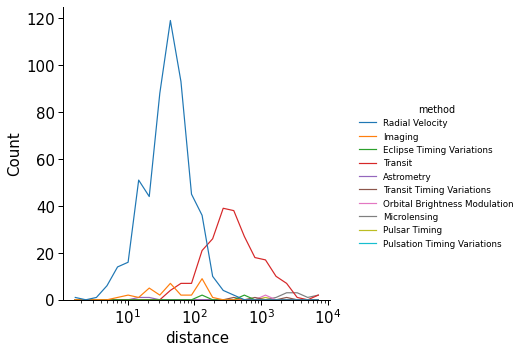

In [54]:
df_planets = sns.load_dataset('planets')
sns.displot(x = 'distance', hue= 'method', log_scale = True, element='poly', fill=False, data=df_planets)

- 한 캔버스 내에 여러 그래프를 그리지 않고 그래프를 서로 다른 캔버스에 나누어서 그리고 싶다면 col 옵션을 사용하면 됩니다. col 옵션은 그래프를 개별 캔버스에 나누어 그려줍니다.

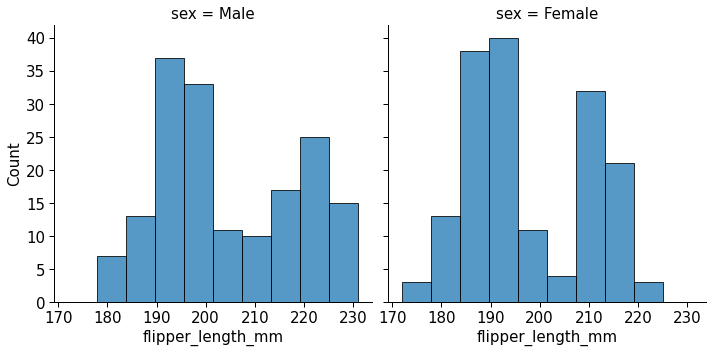

In [55]:
sns.displot(x='flipper_length_mm',col='sex',data=df_penguins)

- 만일 두 변량이 모두 수치형이라면 이변량 히스토그램은 히트맵(heatmap) 같은 모양을 띠게 됩니다.

binwidth: 직사각형 크기 지정

cbar: 색 집중도에 따른 빈도수를 나타내는 컬러바 유무 지정

hue: 색으로 구분되는 그룹별 그래프 설정(분포 간 중복되는 부분이 적어야 함)

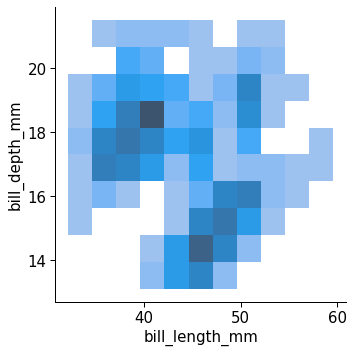

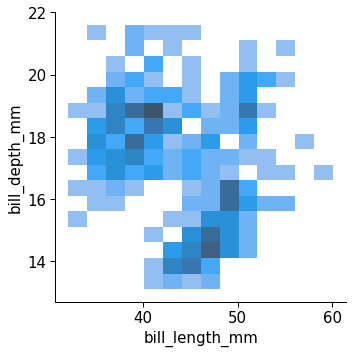

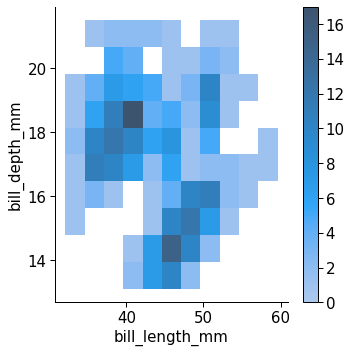

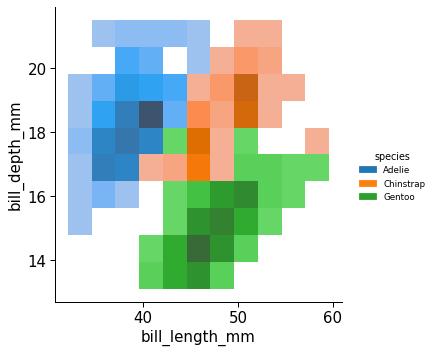

In [56]:
# 코드1: 2차원 - 기본
sns.displot(x='bill_length_mm', y='bill_depth_mm', 
            data=df_penguins)

# 코드2: 2차원 - 직사각형 넓이 조정
sns.displot(x='bill_length_mm', y='bill_depth_mm', binwidth=(2, .5), 
            data=df_penguins)

# 코드3: 2차원 - 컬러바 유무 지정
sns.displot(x='bill_length_mm', y='bill_depth_mm', cbar=True, 
            data=df_penguins)

# 코드4: 3차원 - 그룹별 색으로 분류
sns.displot(x='bill_length_mm', y='bill_depth_mm', hue='species', 
            data=df_penguins)

bins: 등급 수 지정하기

discrete: x축 라벨을 막대 중간에 위치시키기(True)

pthresh: 전체 데이터 중에서 해당 비율(0~1)의 셀 투명 처리하기

pmax: 포화도 최댓값(0~1) 지정하기

In [ ]:
# 코드1: 튜플로 x와 y변수 다르게 지정
sns.displot(df_planets, x='year', y='distance',
            bins=30, discrete=(True, False), log_scale=(False, True))

# 코드2: 관측치가 없는 부분 색으로 표시(투명하게 표시하지 않기)
sns.displot(df_planets, x='year', y='distance',
            bins=30, discrete=(True, False), 
            log_scale=(False, True),
            thresh=None)

# 코드3: 한계점과 포화도 지정
sns.displot(df_planets, x='year', y='distance',
            bins=30, discrete=(True, False), 
            log_scale=(False, True),
            pthresh=.05, pmax=.9)

# 코드4: 컬러맵 추가
sns.displot(df_planets, x='year', y='distance',
            bins=30, discrete=(True, False), 
            log_scale=(False, True),
            cbar=True, cbar_kws=dict(shrink=.75))

**정규 히스토그램(전체 관측수)**


Seaborn에서 전체 관측수로 정규화한 히스토그램을 만들려면 sns.histplot 함수 또는 sns.displot 함수에 stat='probability' 또는 stat='percent' 옵션을 추가하면 됩니다. stat 옵션에 probability 인자를 주면 y축이 확률(probability)인 그래프가 그려집니다. 반면, percent 옵션을 사용하면 y축이 백분율(percent)인 그래프가 만들어집니다. 전자의 경우 막대들의 높이를 모두 더하면 1이 되고, 후자의 경우에는 100이 됩니다. 이 옵션을 추가면 각 등급의 빈도수를 전체 관측수로 나눈 정규 히스토그램을 만들 수 있습니다. 예시 코드는 다음과 같습니다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Probability'>

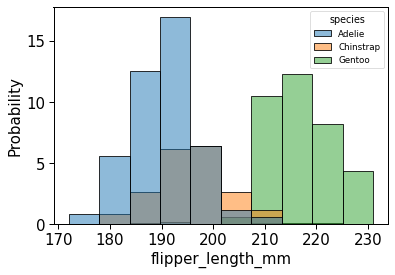

In [57]:
# 코드1: y축이 비율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='probability', data=df_penguins)

# 코드2: y축이 백분율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='percent', data=df_penguins)


#단점? 전체에 대한 평균이 됨 -> 각가에 대한 평균을 내야함 -> common_norm =False를 주면 각자 정규화가 됨됨

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Probability'>

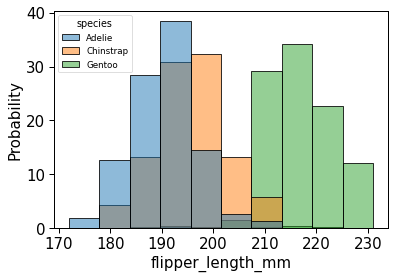

In [58]:
#common_norm =False를 주면 각자 정규화가 됨
# 코드1: y축이 비율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='probability', 
             common_norm =False, data=df_penguins)

# 코드2: y축이 백분율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='percent',
             common_norm =False, data=df_penguins)



### 6) 밀도그림

커널밀도추정이란 커널 함수(kernel function)를 이용해서 확률변수의 확률밀도함수를 추정하는 비모수적(non-parametric) 통계 방법입니다. 비모수적 방법이란 관측 데이터가 특정 확률분포를 따른다는 전제 없이 실시하는 검정 방법입니다. 커널 함수란 원점을 중심으로 대칭을 이루고, 양의(non-negative) 실수(real-valued)값을 가지며, 적분값이 1인 함수(K)를 뜻합니다. 커널 함수에는 대표적으로 가우시안(Gaussian), 코사인(cosine), Epanechnikov 함수 등이 있습니다.


- 밀도그림(density plot)은 커널 스무딩(kernel smoothing)을 이용해 추정한 히스토그램의 확률밀도함수입니다. KDE에서는 데이터를 커널 함수로 대치하여 히스토그램에서 나타났던 등급의 불연속성 문제를 해결합니다. KDE로 추정한 확률밀도함수는 부드러운 곡선입니다.

- 단, KDE 방법을 사용할 때는 조건이 있습니다. KDE 방법은 극단값이 없는 연속 자료에 사용합니다. 확률밀도함수는 부드러운 곡선인데 이상치가 있으면 해당 값에서 확률밀도함수가 뾰족한 모양을 띠게 되기 때문입니다. 이상치가 있는 연속 자료에는 KDE 보다는 히스토그램을 사용하는 것이 적합합니다.

- Seaborn에서 KDE 방법을 통해 확률밀도함수를 그리려면 sns.kdeplot을 이용하면 됩니다. sns.displot 함수에 kind='kde' 옵션을 주어도 됩니다. 이번에는 sns.displot 함수에 kind='kde' 옵션을 추가해서 그려보겠습니다.

multiple='stack': 그래프 쌓아서 그리기

multiple='fill': 각 값에서 겹친 분포(stacked distribution) 정규화해서 그리기(단변량일 때만 유효, 모든 값에서 y축의 밀도가 1)

fill=True: 그래프 불투명하게 그리기

cumulative=True: 누적분포함수 그리기

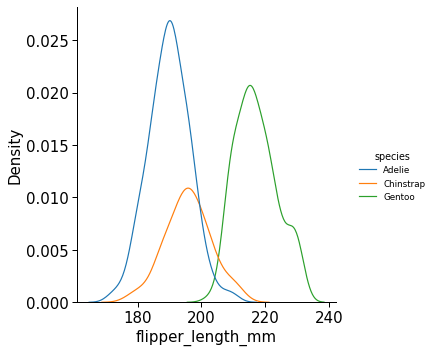

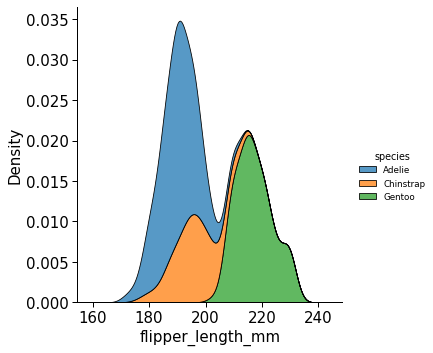

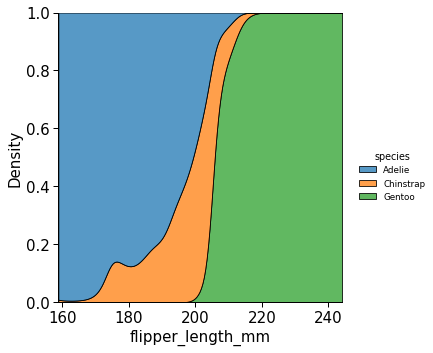

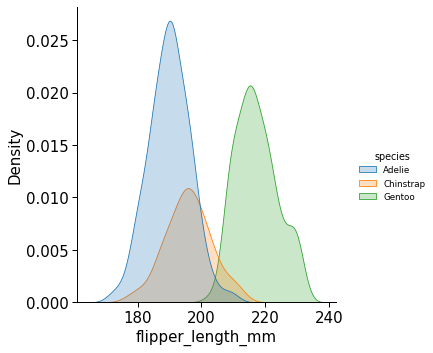

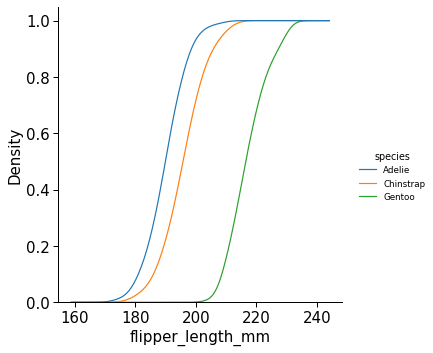

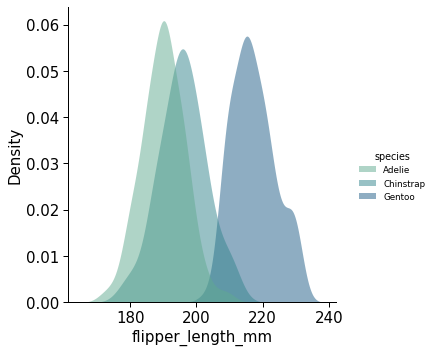

In [59]:
#밀도차이가 크면, 평균에 모여있지 않다는 것 
#분산은 작은게 좋음

# 코드1: 기본 그래프
sns.displot(df_penguins, x='flipper_length_mm', kind='kde', hue='species')

# 코드2: 그래프 겹쳐서 그리기
sns.displot(df_penguins, x='flipper_length_mm', kind='kde', hue='species', multiple='stack')

# 코드3: 모든 값에서 겹친 분포 정규화하기
sns.displot(df_penguins, x='flipper_length_mm', kind='kde', hue='species',multiple='fill')

# 코드4: 그래프 불투명하게 그리기
sns.displot(df_penguins, x='flipper_length_mm', kind='kde', hue='species', fill=True) 
# sns.kdeplot에서는 shade=True도 사용 가능

# 코드5: 누적분포함수(Cumulative Distribution Function, CDF) 그리기
sns.displot(df_penguins, x='flipper_length_mm', kind='kde', hue='species',
            cumulative=True, common_norm=False, common_grid=True)

# 코드6
sns.displot(df_penguins, x='flipper_length_mm', kind='kde', 
            hue='species',
            fill=True, common_norm=False, palette='crest',
            alpha=.5, linewidth=0)

이변량 KDE 그래프는 등고선(contours)으로 표현됩니다. 각 등고선은 밀도가 같은 지점(iso-proportions)을 이은 것입니다.

thresh: 가장 낮은 레벨의 등고선 크기 조정

levels: 등고선 개수 또는 모양

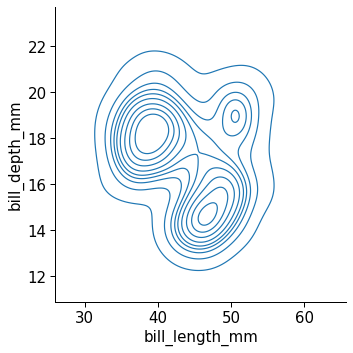

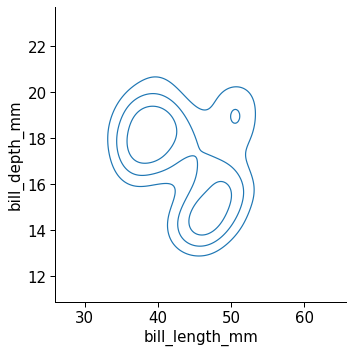

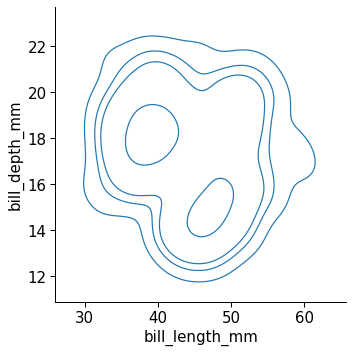

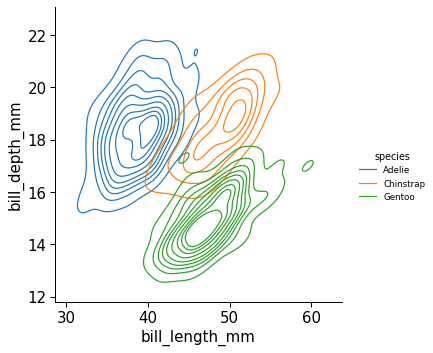

In [60]:
# 코드1: 2차원 - 기본 그래프
sns.displot(df_penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde')

# 코드2: 2차원 - 등고선 크기 및 개수 조정
sns.displot(df_penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde', 
            thresh=.2, levels=4)

# 코드3: 2차원 - 개별 등고선 크기 지정
sns.displot(df_penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde', 
            levels=[.01, .05, .1, .7])

# 코드4: 3차원 - 그룹별 그래프 색으로 구분
sns.displot(df_penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde', 
            hue='species') # fill=True 추가하면 등고선 안이 색으로 채워짐

### 8) 상자그림

Seaborn에서 상자그림을 만들려면 sns.boxplot 함수를 이용하면 됩니다. sns.catplot 함수에 'kind='box'` 옵션을 추가해도 됩니다.

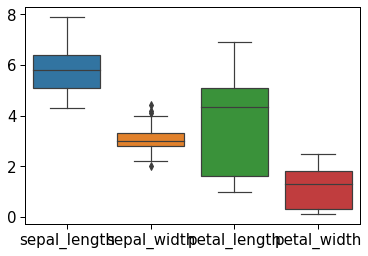

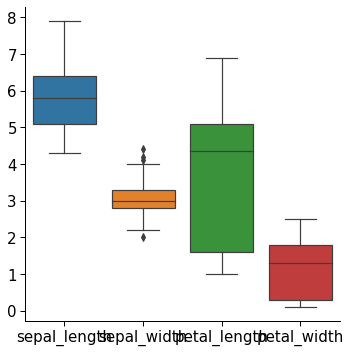

In [62]:
df_iris = sns.load_dataset('iris')
sns.boxplot(data=df_iris)

#또는

sns.catplot(data=df_iris, kind = 'box')

#오렌지 박스플롯, 점= 이상치
#초록색 박스플롯 Q3지점이 이상함 


<AxesSubplot:>

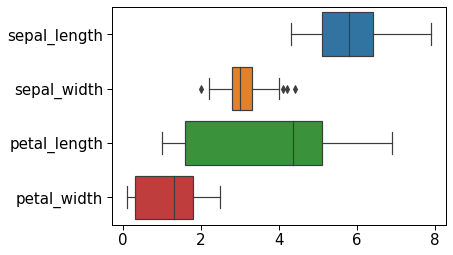

In [63]:
sns.boxplot(data=df_iris, orient='h')

- 박슨 플롯


박슨 플롯은 데이터를 여러 개의 분위로 나눈 박스플롯입니다. 박슨 플롯은 데이터셋을 더 많은 분위수(quantiles)로 나누어 기존의 상자그림보다 이상치(outliers)에 대해 더 많은 정보를 제공합니다. 따라서, 박슨 플롯은 큰 데이터셋을 처리하기에 적합합니다.

박슨 플롯을 만들려면 sns.boxenplot을 이용하면 됩니다. sns.catplot 함수에 kind='boxen' 옵션을 추가해도 됩니다.

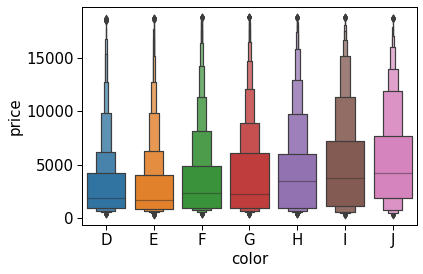

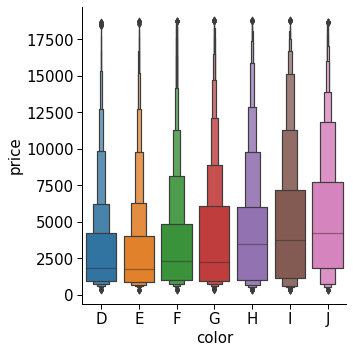

In [64]:
df_diamonds = sns.load_dataset('diamonds')
sns.boxenplot(x='color', y='price', 
              data=df_diamonds.sort_values('color'))

# 또는

sns.catplot(x='color', y='price', kind='boxen',
            data=df_diamonds.sort_values('color'))

- 바이올린 플롯

바이올린 플롯은 상자그림과 KDE 방법을 이용해 추정한 확률밀도함수를 합친 그래프입니다. Seaborn으로 바이올린 플롯을 그리고 싶다면 sns.violinplot 함수를 이용하면 됩니다. sns.catplot 함수에 kind='violin' 옵션을 추가해도 동일한 결과를 얻을 수 있습니다.


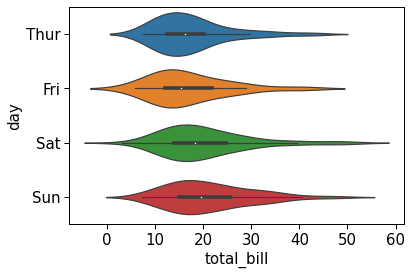

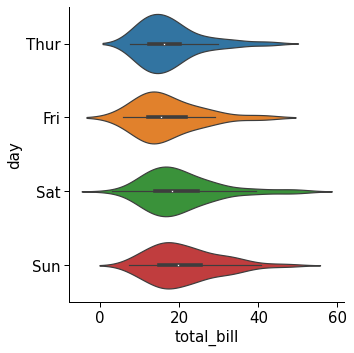

In [65]:
sns.violinplot(x='total_bill', y='day', data=df_tips)

# 또는 

sns.catplot(x='total_bill', y='day', kind='violin', data=df_tips)

### 9) 산점도 행렬.
- 모든 변수에 대해 산점도 행렬을 그리고 싶다면 sns.pairplot 함수를 이용하면 됩니다.

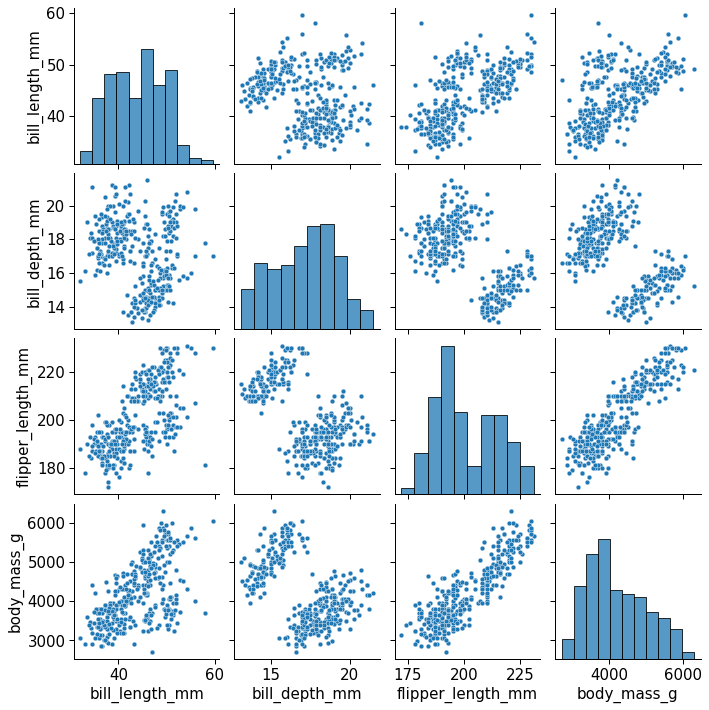

In [66]:
sns.pairplot(df_penguins)

 - corner = True 옵션을 추가하면 산점도 행렬의 절반만 그릴 수도 있다. 

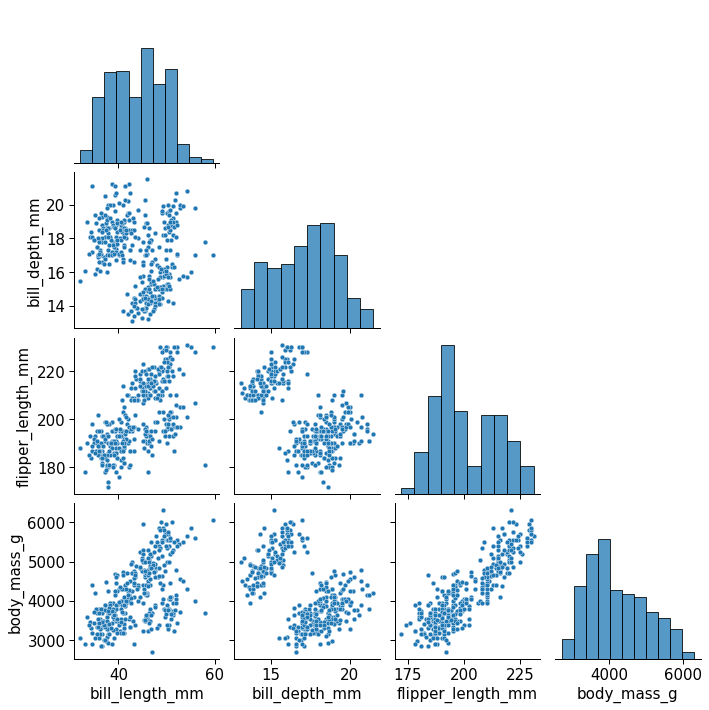

In [67]:
sns.pairplot(df_penguins, corner=True)

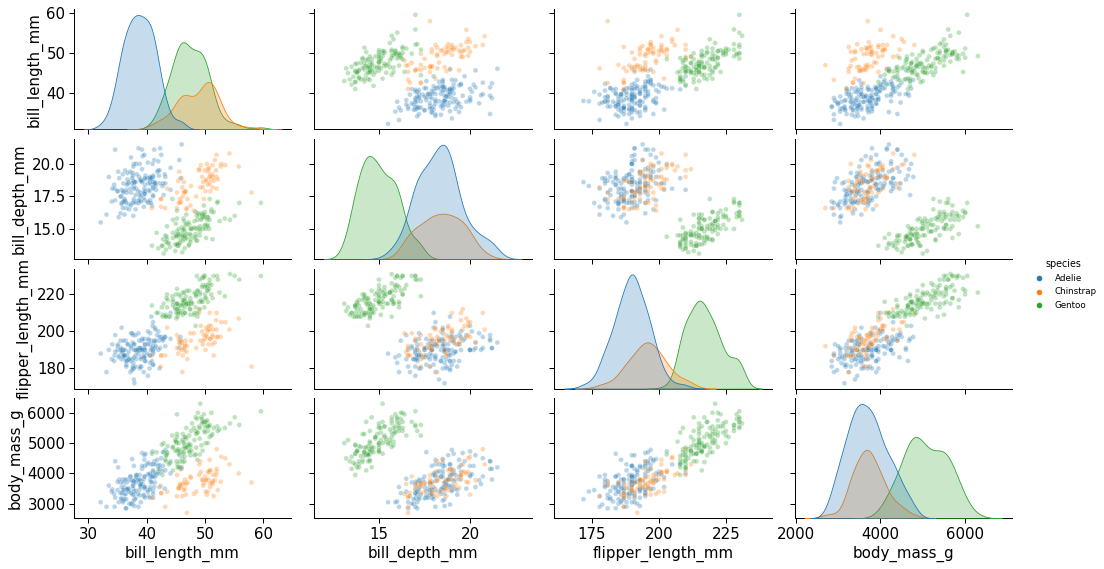

In [68]:
sns.pairplot(df_penguins,
             hue = 'species',
             size = 2, aspect = 1.8,
             plot_kws=dict(linewidth=0.5, alpha=0.3),
             diag_kind='kde',
             diag_kws=dict(shade=True))

#### 10) 상관행렬

Seaborn으로 상관행렬 히트맵(heatmap)을 그리고 싶다면 sns.heatmap를 이용하면 됩니다.

heatmap
상관행렬 히트맵을 만들려면 먼저 상관행렬을 만든뒤 해당 상관행렬 데이터를 sns.heatmap 함수에 전달하면 됩니다.#

In [69]:
from sklearn.datasets import load_wine
wine_data = load_wine()
df_wines = pd.DataFrame(data=wine_data.data,
                        columns = wine_data.feature_names)

In [70]:
df_wines = df_wines.sample(frac=1, random_state=42).reset_index(drop=True) #샘플 무작위로

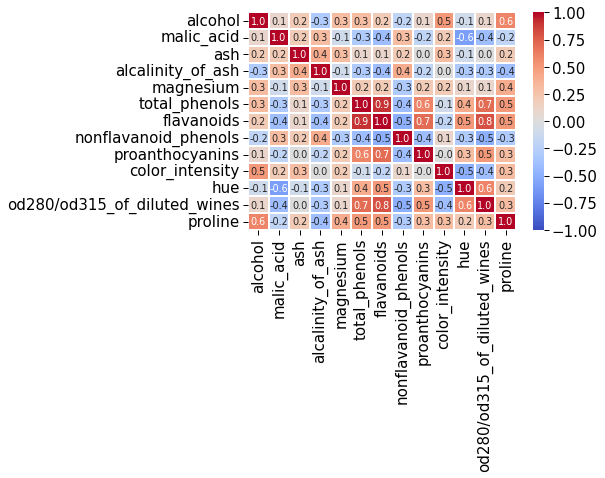

In [73]:
corr = df_wines.corr()
sns.heatmap(round(corr,1),
            annot=True, #상관계수 표시
            fmt='.1f', #상관계수 소수점 자리
            cmap='coolwarm', #컬러맵 색상 팔레트
            vmax = 1.0, #상관계수 최댓값
            vmin = -1.0, #상관계쑤 최솟값
            linecolor='White', #셀 테두리 색상
            linewidths=0.05) #셀 간격
sns.set(rc={'figure.figsize':(15,7)}) #그래프 크기

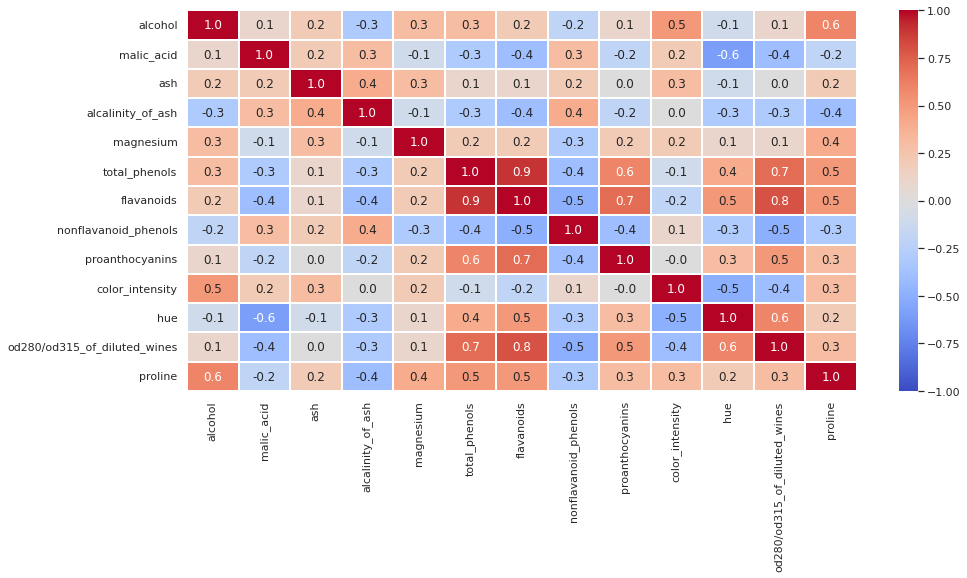

In [74]:
corr = df_wines.corr()
sns.heatmap(round(corr,1),
            annot=True, #상관계수 표시
            fmt ='.1f',#상관계수 소수점 자리
            cmap='coolwarm',#컬러맵 색상 팔레트
            vmax =1.0, #상관계수 최댓값
            vmin = -1.0, #상관계수 최솟값
            linecolor='white',#셀 테두리 색상
            linewidths=0.05) #셀 간격.
sns.set(rc={'figure.figsize':(15,7)}) #그래프 크기

- clustermap

    - Seaborn으로 클러스터맵(cluster map)을 그리려면 sns.clustermap 함수를 이용하면 됩니다. sns.clustermap 함수에는 sns.heatmap 함수와 달리 standard_sacle 파라미터가 있어 클러스터맵의 범위를 0~1로 정규화할 수 있습니다.

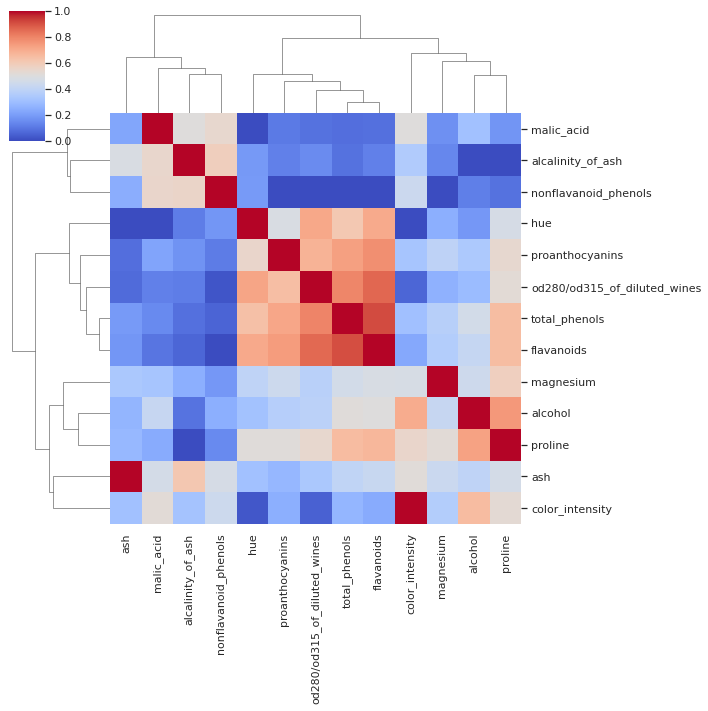

In [76]:
corr = df_wines.corr() # 상관행렬 표 만들기
sns.clustermap(corr, 
               cmap='coolwarm', # 컬러맵 색상 팔레트 
               standard_scale=1)

### 14) 회귀 그래프

- Seaborn으로 회귀 그래프를 그리고 싶다면 sns.regplot 또는 sns.lmplot을 이용하면 됩니다. 먼저 sns.regplot 사용법부터 살펴보겠습니다.

### regplot

sns.regplot은 축 수준(axes-level) 함수로 이 함수를 이용하면 산점도에 회귀선(regression line)과 신뢰구간을 추가할 수 있습니다.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

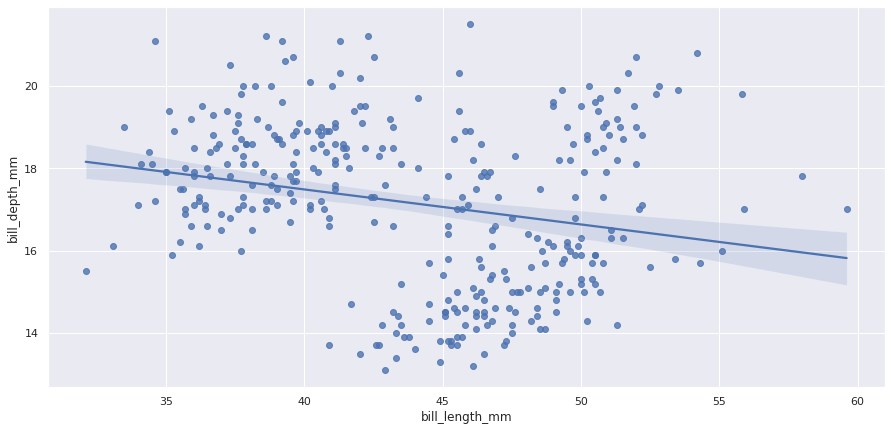

In [78]:
sns.regplot(x='bill_length_mm',y='bill_depth_mm',data = df_penguins)

- - 여기에 lowess=True 옵션을 추가하면 회귀선을 선형이 아니라 중요한 데이터에 가중치를 높이는 국소 회귀(local regression) 기법으로 그립니다. lowess는 locally weighted robust scatterplot smoothing의 약자입니다.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

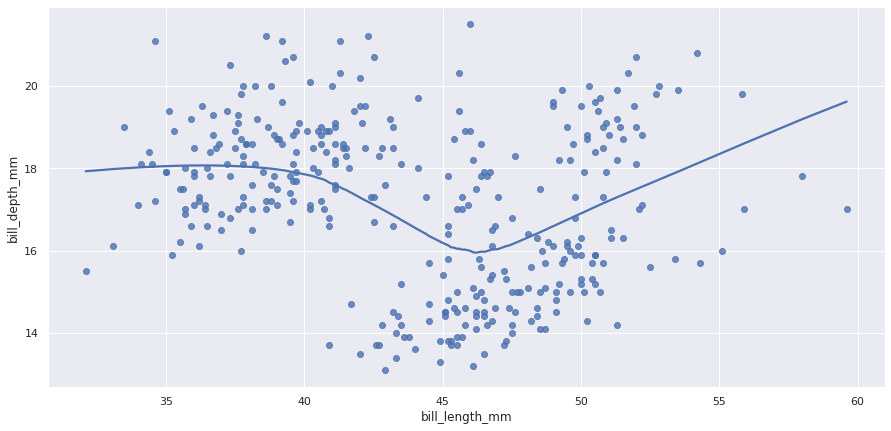

In [79]:
sns.regplot(x='bill_length_mm', y='bill_depth_mm', 
            lowess=True,
            data=df_penguins)

scatter_kws: 점 색상(facecolor, fc), 점 테두리 색상(edgecolor, ec), 크기(size, s), 투명도 지정

color: 선 색상 지정

line_kws: 선 굵기(linewidth, lw), 선 스타일(line style, ls), 투명도 지정

ci: 신뢰구간 지정(기본값: 95)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

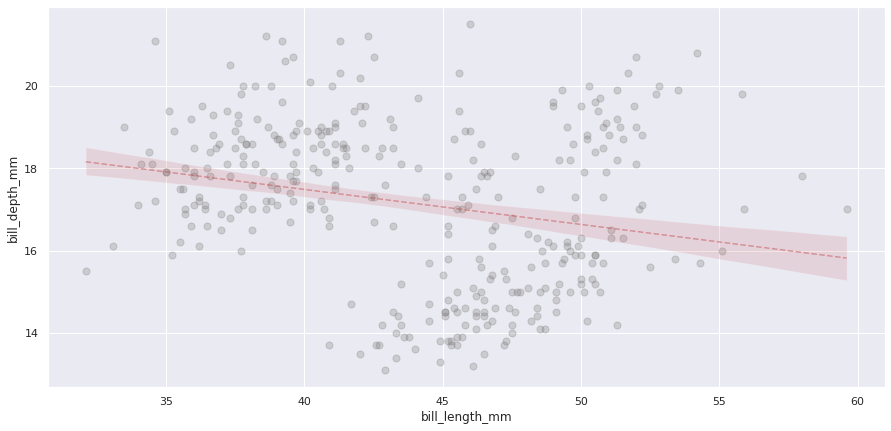

In [80]:
sns.regplot(x='bill_length_mm', y='bill_depth_mm',
            scatter_kws={'fc':'gray', 'ec':'gray', 's':50, 'alpha':0.3},
            color='r', 
            line_kws={'lw':1.5, 'ls':'--','alpha':0.5},
            ci=90,
            data=df_penguins)

- lmplot

sns.lmplot 역시 sns.regplot과 마찬가지로 회귀 그래프를 만들 수 있습니다. 단, sns.lmplot은 그래프 수준(figure-level) 함수로 FacetGrid를 만듭니다. sns.lmplot은 그래프 수준 함수이기 때문에 sns.regplot에서와 달리 hue 또는 col옵션을 사용할 수 있습니다.

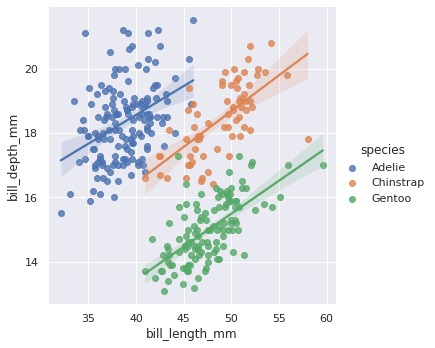

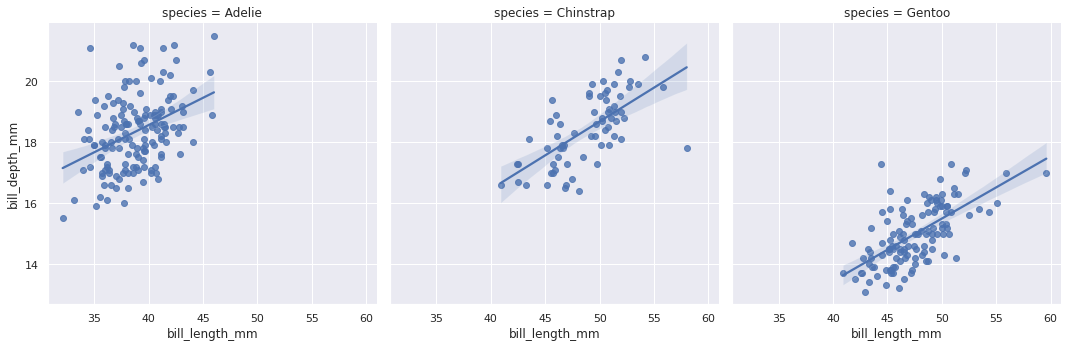

In [81]:
# 코드1
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', 
           hue='species',
           data=df_penguins)

# 코드2
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', 
           col='species',
           data=df_penguins)

전체 데이터포인트를 배경으로 만들고 싶다면 다음 코드를 이용하면 됩니다.

truncate=False: 회귀선 x축 끝까지 표현하지 않기

facet_kws=dict(sharex=False, sharey=False): x축, y축 공유하지 않기

line_kws: 회귀선 스타일 지정하기

scatter_kws: 산점도 점 스타일 지정하기

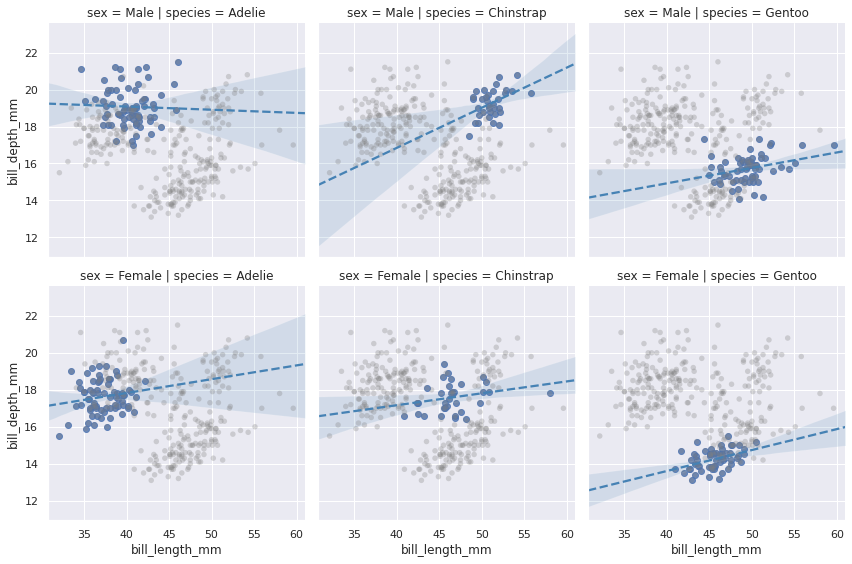

In [82]:
g = sns.lmplot(x='bill_length_mm', y='bill_depth_mm', 
               col='species', row='sex',
               height=4,
               truncate=False,
               line_kws={'color':'steelblue','linestyle':'--' },
               data=df_penguins)

axes = g.axes               # FacetGrid에서 AxesSubplots을 추출
for ax in axes.ravel():     # AxesSubplots을 순회하여 전체 데이터를 배경으로 표현
    sns.regplot(x='bill_length_mm', y='bill_depth_mm', 
                fit_reg=False, # 전체 회귀선 숨기기
                scatter_kws={'fc':'gray', 'ec':'none', 's':30, 'alpha':0.3}, 
                ax=ax,
                data=df_penguins)

- resideplot
    - sns.resideplot은 실제 데이터포인트와 회귀선과의 잔차(residuals)를 표현하는 함수입니다.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

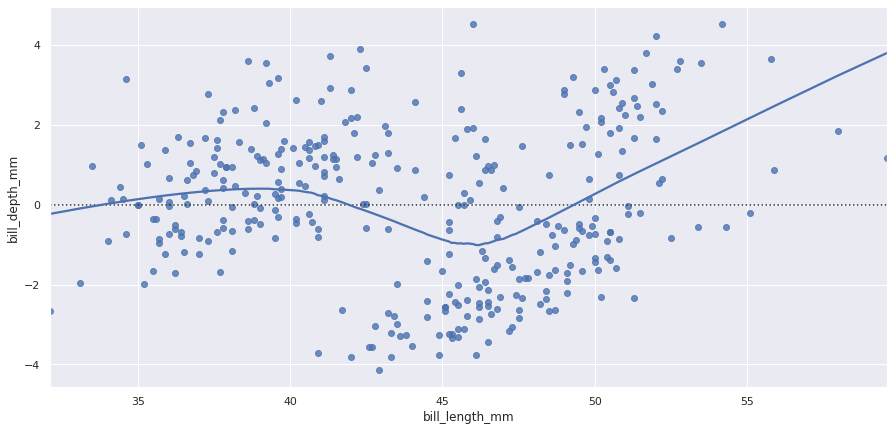

In [83]:
sns.residplot(x='bill_length_mm', y='bill_depth_mm', 
              lowess=True,
              data=df_penguins)